# Интерполяция параметрически заданной функции
## Задача: 
Рассмотрим задачу поиска интерполирующей кривой по точкам
$p_1, p_2, \dots, p_n$, $p_i = (x_i, y_i)$ ($i=1,\dots,n$).
Предположим, что форму этой кривой
нельзя описать функцией вида $y=f(x)$. Например, этого нельзя сделать
для кривой в форме буквы S и др. (функция была бы неоднозначной).

Нарисуйте букву S (или любую другую) и измерьте координаты $8$ точек $p_i$,
лежащих на ней. Интерполируйте двумя способами эти данные
 * кубическим интерполянтом;
 * кубическим сплайном.
 
Изобразите полученные кривые и сравните результаты.

## Подготовка

Измерим и запишем координаты 8 точек нашей будущей кривой (буквы S)

In [269]:
import matplotlib.pyplot as plt
import matplotlib.transforms as trans
import numpy as np
from numpy.polynomial.polynomial import Polynomial as poly
from scipy import interpolate
%matplotlib inline

In [270]:
x = np.array([4, 2.5, 1, 2, 3,   4,   2.5, 1  ])
y = np.array([4, 4.5, 4, 3, 2.5, 1.5, 1,   1.5])

Изобразим эти точки:

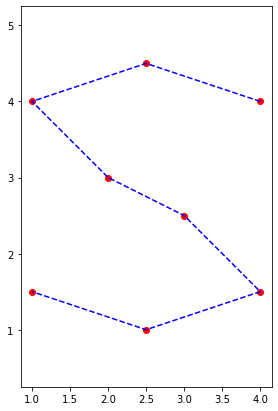

In [271]:
plt.figure(figsize = (4.5, 7))
plt.axis('equal')
plt.plot(x, y, 'or', x, y, '--b')

Cоединив точки, получаем изображание угловатой буквы S, такое расположение точек подходит.

## Решение первым способом
Для решения задачи можно рассмотреть два набора данных $(i, x_i)$ и $(i, y_i)$, где $i = 1, 2, ..., n$

Если их независимо интерполировать функциями $f(t)$ и $g(t)$, то получим параметрически заданную кривую:

$$
\left\{
\begin{array}{l}
x=f(t) \\
y=g(t)
\end{array}
\right.
$$

Эта кривая и будет интерполировать наши данные.

Создадим массив значений $i$ и точек $t$ при помощи linspace:

In [272]:
i = np.linspace(1, 8, 8)
t = np.linspace(1, 8, 500)

Интерполируем их _кубическим интерполянтом_:

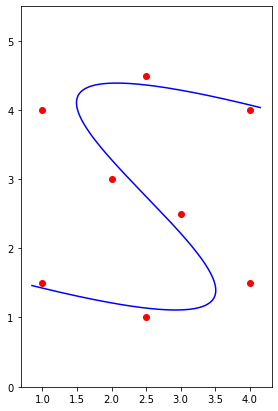

In [273]:
f = np.polyfit(i, x, 3)
g = np.polyfit(i, y, 3)
xx = np.polyval(f, t)
yy = np.polyval(g, t)
plt.figure(figsize = (4.5, 7))
plt.axis('equal')
plt.plot(xx, yy, '-b', x, y, 'or')

Как можно видеть, в целом кривая похожа на S, но она не проходит через исходные точки, только около концов - очень близко, но тоже не проходит

Интерполируем теперь _кубическим сплайном_:

In [274]:
f = interpolate.interp1d(i, x, kind='cubic')
g = interpolate.interp1d(i, y, kind='cubic')
xx2 = f(t)
yy2 = g(t)

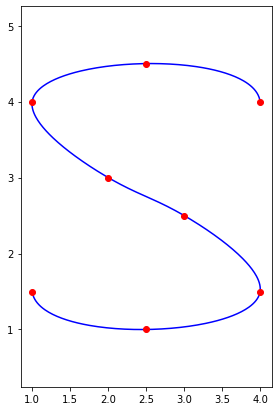

In [275]:
plt.figure(figsize = (4.5, 7))
plt.axis('equal')
plt.plot(xx2, yy2, '-b', x, y, 'or')

После интерполяции кубическим сплайном кривая проходит через исходные точки гораздо точнее.

## Решение вторым способом
Для решения задачи вторым способом необходимо теперь интерполировать данные $(\sum_{j=1}^{i-1} d_j, x_i)$
и $(\sum_{j=1}^{i-1} d_j, y_i)$, где $d_i$ – расстояние между точками
$p_i$ и $p_{i+1}$, $i = 1,\dots,n$

Обозначим $\sum_{j=1}^{i-1} d_j$ как $s_i$. $s_i$ можно представить в виде рекуррентного соотношения $s_i = s_{i-1} + d_{i-1}, s_1 = 0$. В таком виде очень просто вычислить массив этих значений

In [276]:
s = np.array([0])

for i in range(len(x[1:])):
    s = np.append(s, s[i] + np.sqrt((x[i+1] - x[i])**2 + (y[i+1] - y[i])**2))
print(s)

[ 0.          1.58113883  3.16227766  4.57649122  5.69452521  7.10873877
  8.6898776  10.27101643]


Теперь интерполируем эти данные кубическим интерполянтом:

In [277]:
t = np.linspace(s[0], s[-1], 500)
f = np.polyfit(s, x, 3)
g = np.polyfit(s, y, 3)
xx3 = np.polyval(f, t)
yy3 = np.polyval(g, t)

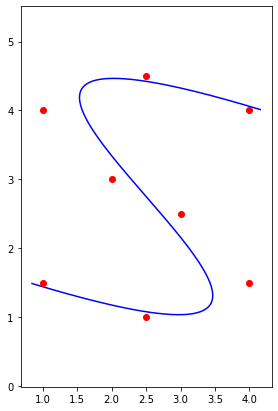

In [278]:
plt.figure(figsize = (4.5, 7))
plt.axis('equal')
plt.plot(xx3, yy3, '-b', x, y, 'or')

Можно сравнить результаты первого способа и второго для кубического интерполянта:

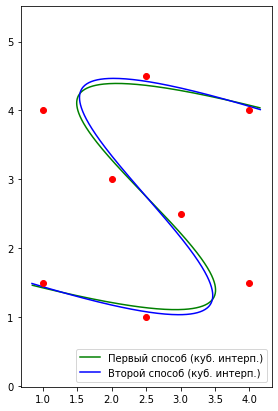

In [279]:
plt.figure(figsize = (4.5, 7))
plt.axis('equal')
plt.plot(xx, yy, '-g', label = 'Первый способ (куб. интерп.)')
plt.plot(xx3, yy3, '-b', label = 'Второй способ (куб. интерп.)')
plt.legend(loc = 'lower right')
plt.plot(x, y, 'or')

Видно, что кривые слегка различаются, однако эти различия достаточно незначительные

Интерполируем теперь кубическим сплайном:

In [280]:
f = interpolate.interp1d(s, x, 'cubic')
g = interpolate.interp1d(s, y, 'cubic')
xx4 = f(t)
yy4 = g(t)

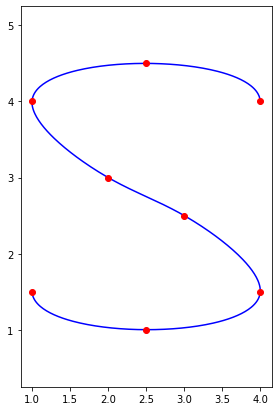

In [281]:
plt.figure(figsize = (4.5, 7))
plt.axis('equal')
plt.plot(xx4, yy4, '-b', x, y, 'or')

Сравним эту кривую с полученной первым способом:

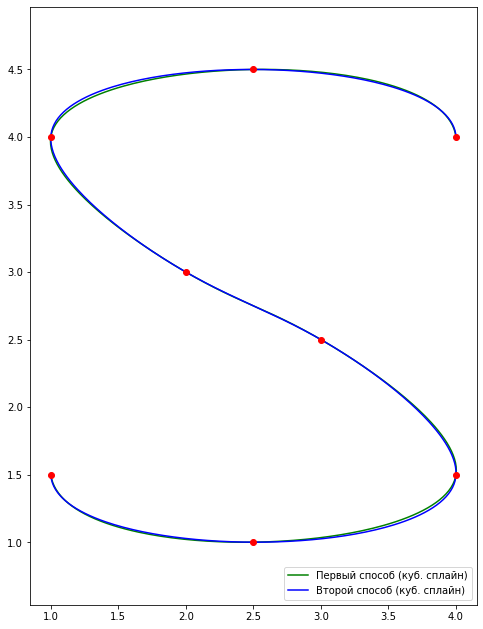

In [288]:
plt.figure(figsize = (8, 11))
plt.axis('equal')
plt.plot(xx2, yy2, '-g', label = 'Первый способ (куб. сплайн)')
plt.plot(xx4, yy4, '-b', label = 'Второй способ (куб. сплайн)')
plt.legend(loc = 'lower right')
plt.plot(x, y, 'or')

Различия между этими кривыми настолько малы, что их можно заметить только если очень внимательно приглядеться или сильно увеличить изображение, что я и сделал выше.

# Выводы
Исходя из полученных данных, можно сделать выводы:
1. Кубический интерполянт и кубический сплайн дают достаточно сильно различающиеся кривые. Кубический интерполянт даёт более гладкую кривую, но при этом "не попадает" в исходные точки, кубический сплайн даёт менее гладкую кривую, но она при этом проходит через исходные точки;
2. Решение задачи двумя способами, описанными выше, даёт различные результаты, однако разница между полученными кривыми мала, причём у интерполяции кубическим сплайном эта разница меньше, чем у интерполяции кубическим интерполянтом.